In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
#making charts look cleaner
sns.set_theme(style="whitegrid")


df = pd.read_csv(r"C:/Police forces preprocessing/cleaned_wales_crime.csv") # updating path


BASIC OVERVIEW

In [6]:
#trying to confirm everything is clean before starting EDA

df.head()
df.info()
df.describe(include='all')
df['Crime type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631783 entries, 0 to 631782
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Month                  631783 non-null  object 
 1   Reported by            631783 non-null  object 
 2   Longitude              631783 non-null  float64
 3   Latitude               631783 non-null  float64
 4   Location               631783 non-null  object 
 5   LSOA name              631783 non-null  object 
 6   Crime type             631783 non-null  object 
 7   Last outcome category  631783 non-null  object 
 8   PoliceForce            631783 non-null  object 
dtypes: float64(2), object(7)
memory usage: 43.4+ MB


Crime type
Violence and sexual offences    242722
Anti-social behaviour           101463
Public order                     62080
Criminal damage and arson        54134
Shoplifting                      49681
Other theft                      35302
Vehicle crime                    22885
Burglary                         18363
Drugs                            16305
Other crime                      14025
Possession of weapons             4846
Bicycle theft                     4507
Theft from the person             2942
Robbery                           2528
Name: count, dtype: int64

CRIME TYPE DISTRIBUTION

C:\Users\luqma\AppData\Local\Temp\ipykernel_42192\2345580214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Crime type', order=df['Crime type'].value_counts().index, palette='viridis')


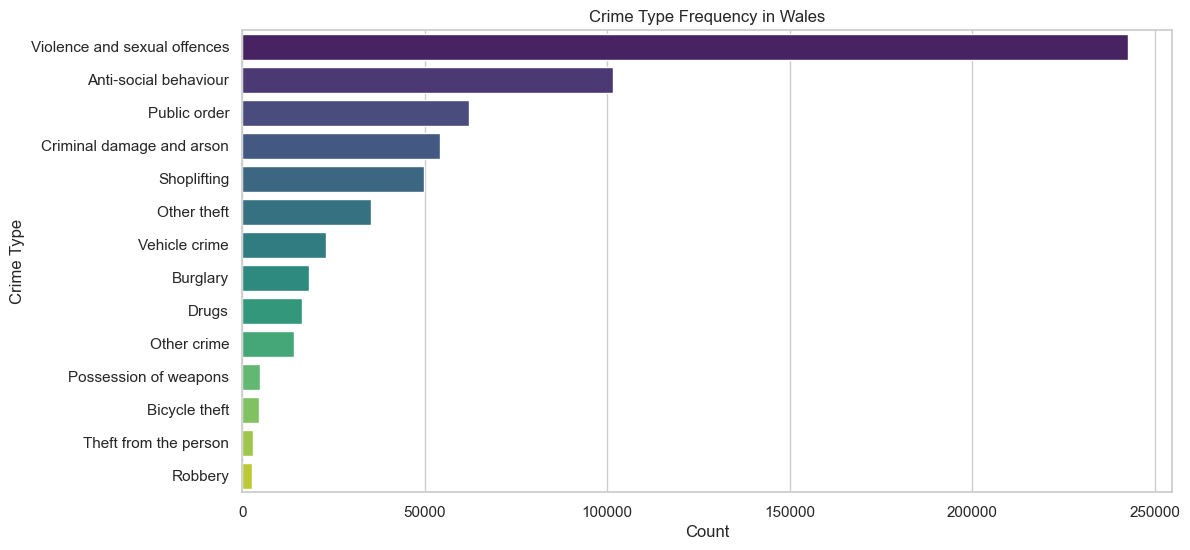

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Crime type', order=df['Crime type'].value_counts().index, palette='viridis')
plt.title("Crime Type Frequency in Wales")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

TREND OVER TIME (MONTHLY CRIME COUNTS)

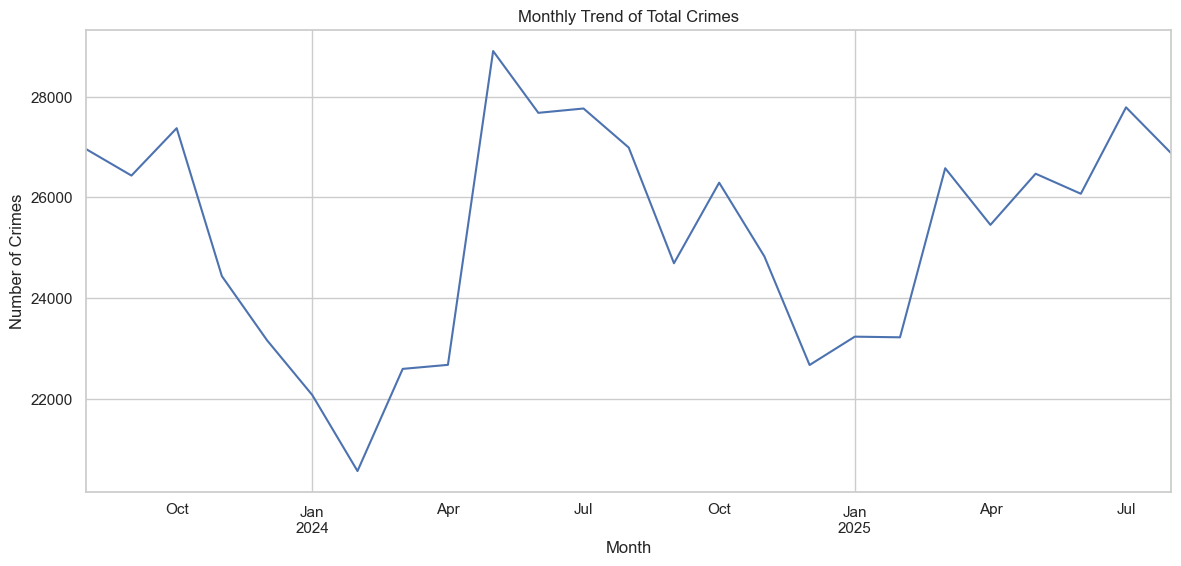

In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df['Year-Month'] = df['Month'].dt.to_period('M')

plt.figure(figsize=(14,6))
df['Year-Month'].value_counts().sort_index().plot(kind='line')
plt.title("Monthly Trend of Total Crimes")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

CRIME BY POLICE FORCE

C:\Users\luqma\AppData\Local\Temp\ipykernel_42192\1260803955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PoliceForce', order=df['PoliceForce'].value_counts().index, palette='magma')


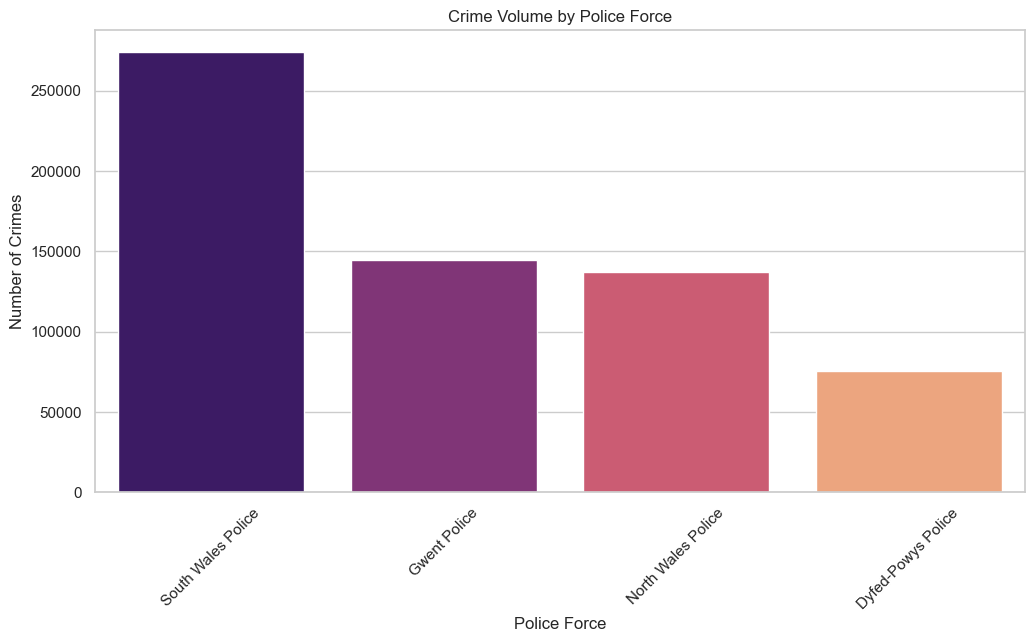

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='PoliceForce', order=df['PoliceForce'].value_counts().index, palette='magma')
plt.title("Crime Volume by Police Force")
plt.xlabel("Police Force")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

GEOGRAPHICAL DISTRIBUTION 

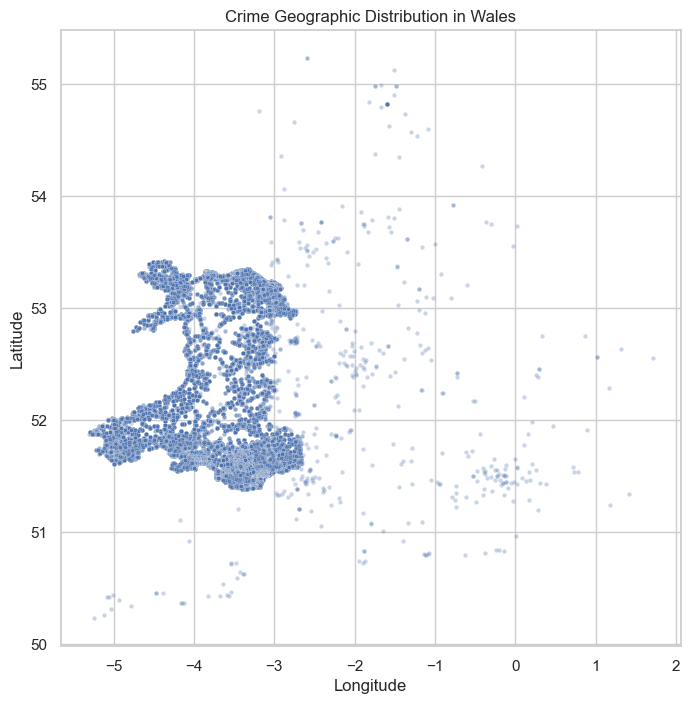

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.3, s=10)
plt.title("Crime Geographic Distribution in Wales")
plt.show()


TOP CRIME LOCATIONS (STREET/AREA HOTSPOTS)

C:\Users\luqma\AppData\Local\Temp\ipykernel_42192\3765101946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


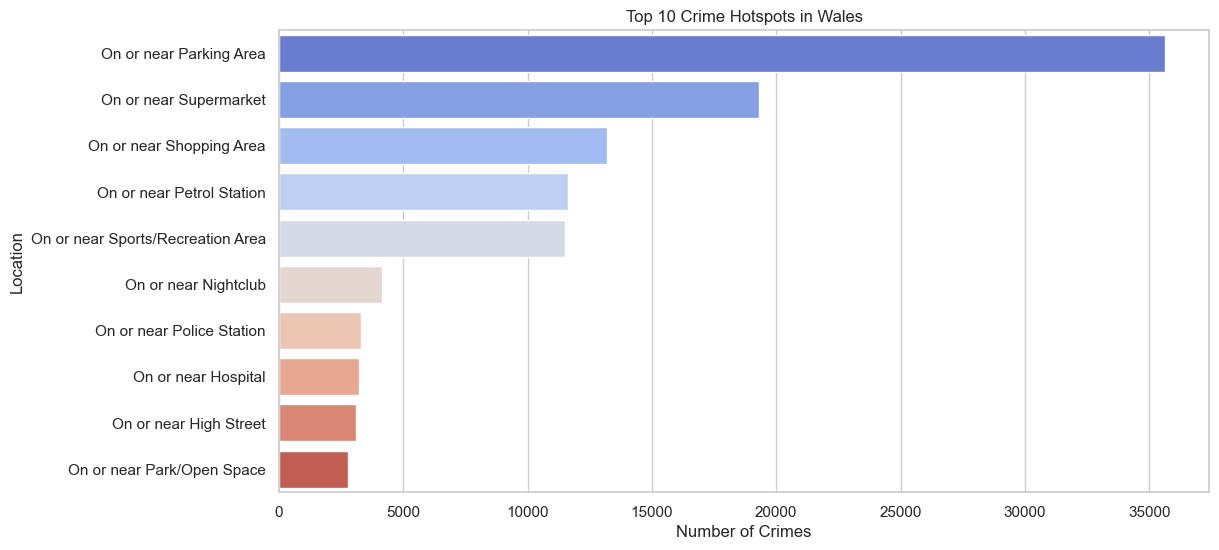

In [16]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title("Top 10 Crime Hotspots in Wales")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.show()

In [5]:
import folium
from folium.plugins import HeatMap

# Keep only rows with valid coordinates
df_map = df.dropna(subset=["Latitude", "Longitude"])

# Filter strictly to Wales region
df_map = df_map[
    (df_map['Latitude'] >= 51.35) &
    (df_map['Latitude'] <= 53.45) &
    (df_map['Longitude'] >= -5.35) &
    (df_map['Longitude'] <= -2.65)
]

# Remove duplicate coordinate points
df_map = df_map.drop_duplicates(subset=['Latitude', 'Longitude'])

# Create map centered on Wales
wales_center = [52.3, -3.5]
m = folium.Map(location=wales_center, zoom_start=7)

# Prepare heat data (latitude, longitude)
heat_data = df_map[['Latitude', 'Longitude']].values.tolist()

# Add heat layer
HeatMap(heat_data, radius=6, blur=4).add_to(m)

# Save to HTML (open in browser)
m.save("wales_crime_heatmap.html")

print("✅ Heatmap created successfully!")
print("➡️ Open: wales_crime_heatmap.html")

✅ Heatmap created successfully!
➡️ Open: wales_crime_heatmap.html


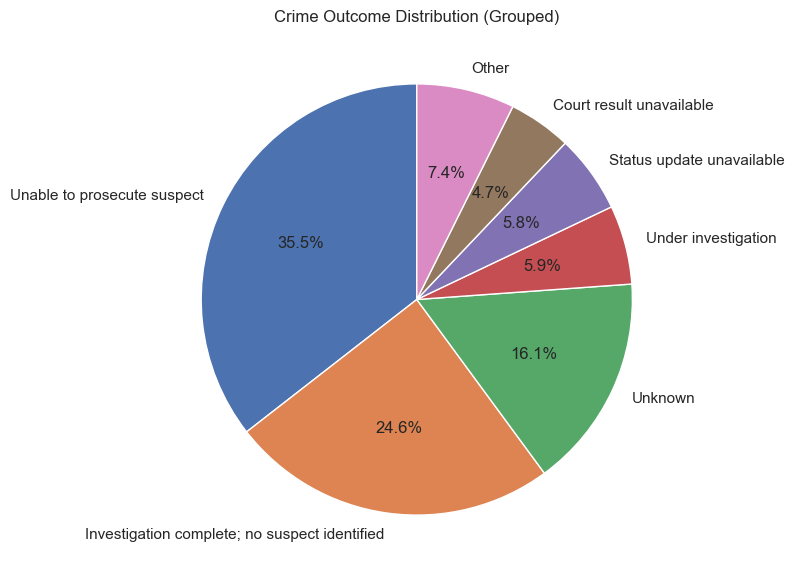

In [7]:
# Calculate percentages
outcome_counts = df['Last outcome category'].value_counts(normalize=True) * 100

# Group outcomes under 4.7% into "Other"
major_outcomes = outcome_counts[outcome_counts >= 4.7]
other_total = outcome_counts[outcome_counts < 4.7].sum()

# Combine into one final series
final_outcomes = major_outcomes.copy()
final_outcomes['Other'] = other_total

# Plot pie chart
final_outcomes.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(7,7),
    startangle=90
)

plt.title("Crime Outcome Distribution (Grouped)")
plt.ylabel("")
plt.show()

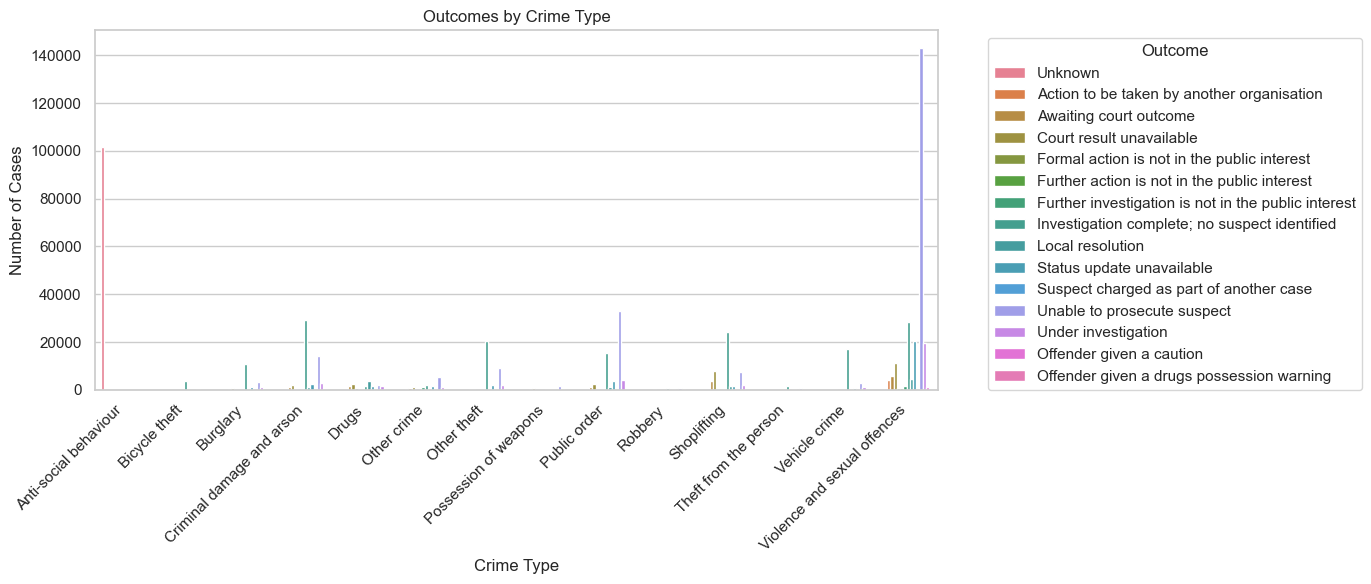

In [10]:
outcome_by_crime = df.groupby(['Crime type', 'Last outcome category']).size().reset_index(name='Count')

plt.figure(figsize=(14,6))
sns.barplot(data=outcome_by_crime, x='Crime type', y='Count', hue='Last outcome category')
plt.title("Outcomes by Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

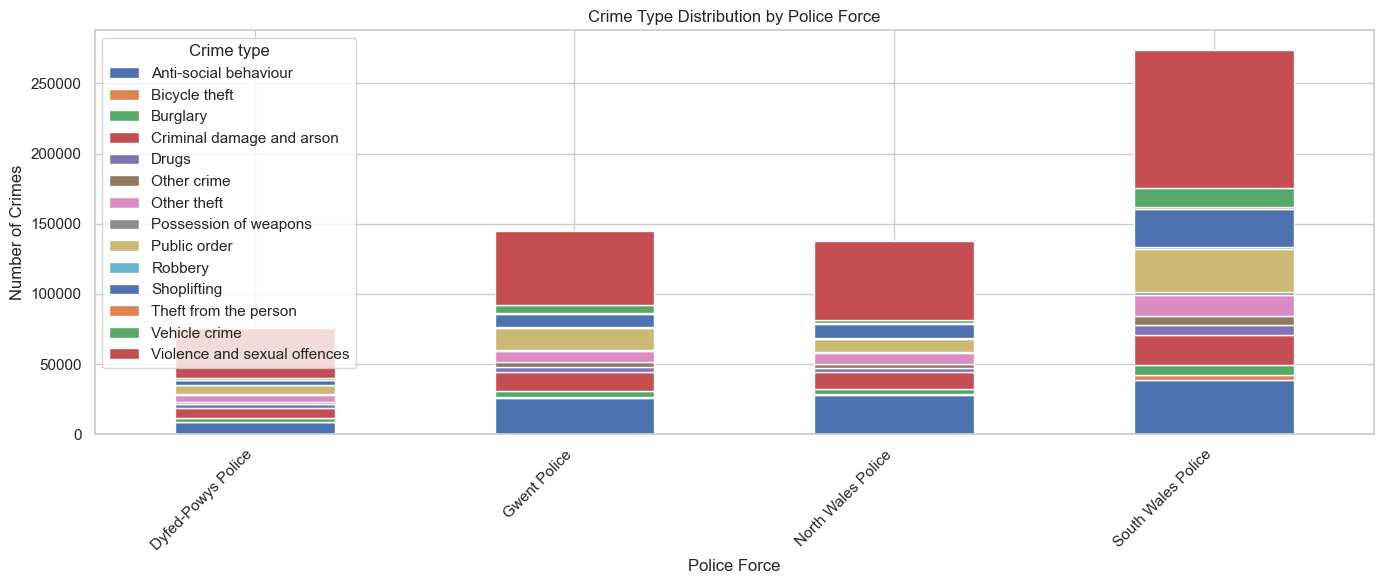

In [11]:
force_crime = df.groupby(['PoliceForce', 'Crime type']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
force_crime.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Crime Type Distribution by Police Force")
plt.xlabel("Police Force")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

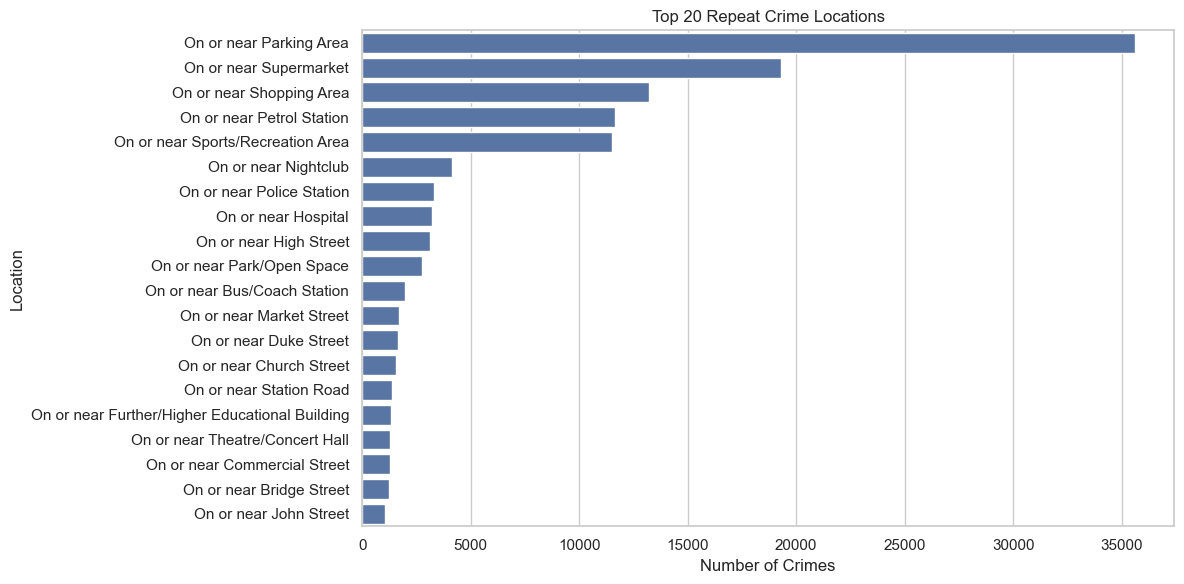

In [12]:
location_counts = df['Location'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title("Top 20 Repeat Crime Locations")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.tight_layout()
plt.show()